In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
api_poisson = pd.read_csv('api.csv')

In [3]:
api_poisson.rename(columns = {'Median Income':'median_income'}, inplace = True)
api_poisson.rename(columns = {'burglaries/thousand':'burglaries_per_thousand'}, inplace = True)
api_poisson

,Unnamed: 0,NAME,Population,state,county,tract,median_income,count_burglary,burglaries_per_thousand
0,0,"Census Tract 190.04, Davidson County, Tennessee",4470,47,37,19004,44001,18.0,4.026846
1,1,"Census Tract 190.07, Davidson County, Tennessee",2904,47,37,19007,48485,4.0,1.377410
2,2,"Census Tract 190.08, Davidson County, Tennessee",6005,47,37,19008,50512,1.0,0.166528
3,3,"Census Tract 191.05, Davidson County, Tennessee",5707,47,37,19105,48271,5.0,0.876117
4,4,"Census Tract 191.06, Davidson County, Tennessee",4336,47,37,19106,65323,5.0,1.153137
...,...,...,...,...,...,...,...,...,...
165,169,"Census Tract 189.01, Davidson County, Tennessee",3280,47,37,18901,47500,6.0,1.829268
166,170,"Census Tract 189.02, Davidson County, Tennessee",2704,47,37,18902,75286,1.0,0.369822
167,171,"Census Tract 189.04, Davidson County, Tennessee",3410,47,37,18904,61750,10.0,2.932551
168,172,"Census Tract 189.05, Davidson County, Tennessee",3292,47,37,18905,65960,6.0,1.822600


In [9]:
pr_burg_medinc = smf.glm('burglaries_per_thousand ~ median_income',
                 data = api_poisson,
                 offset = np.log(api_poisson['Population']),
                 family = sm.families.Poisson()).fit()

pr_burg_medinc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     burglaries_per_thousand   No. Observations:                  163
Model:                                 GLM   Df Residuals:                      161
Model Family:                      Poisson   Df Model:                            1
Link Function:                         log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -337.73
Date:                     Thu, 10 Nov 2022   Deviance:                       318.57
Time:                             21:30:17   Pearson chi2:                     658.
No. Iterations:                          5                                         
Covariance Type:                 nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.5121      0.170    -38.271      0.000      -6.846      -6.179
median_income -1.999e-05   2.86e-06     -6.989      0.000   -2.56e-05   -1.44e-05
=================================================================================
"""

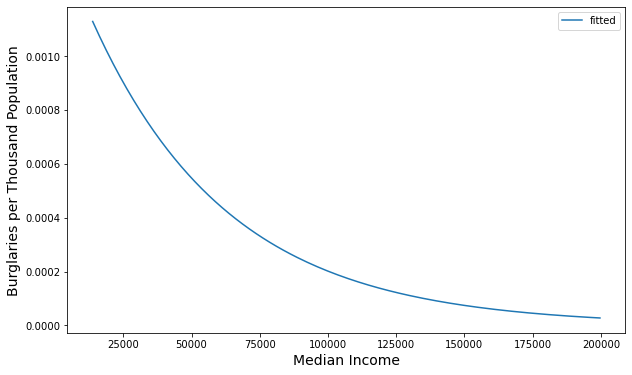

In [6]:
fit_df = pd.DataFrame({
    'median_income': np.linspace(start = api_poisson['median_income'].min(),
                       stop = api_poisson['median_income'].max(),
                       num = 150)
})
fit_df['fitted'] = pr_burg_medinc.predict(fit_df)

fit_df.plot(x = 'median_income', y = 'fitted', figsize = (10,6))

fontsize = 14
plt.xlabel('Median Income', fontsize = fontsize)
plt.ylabel('Burglaries per Thousand Population', fontsize = fontsize);